# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Malware Type.

Assume that the dataset is already pre-processed:
1. Removal of nan values
2. Data Cleaning (Removal of False Labels and *Removal/Aggregation of malware types of poor quantity*)
3. Inverse Ordinal Encoding (for representation purposes only)

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Manual_DBSCAN_Clustering_w_FalseLabels.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['type'].value_counts().index)
        counts = list(df_copy['type'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())
    print("Number of Samples Remaining:", malicious_df.shape[0])

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_94,t_95,t_96,t_97,t_98,t_99,malware,type,pattern,cluster
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,171,215,35,208,56,71,1,trojan,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos...",0
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,71,297,135,171,215,35,1,pua,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,113,112,1,trojan,"SetUnhandledExceptionFilter,OleInitialize,LdrL...",2
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,302,187,208,302,228,302,1,trojan,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",3
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,141,260,141,260,1,trojan,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",4
5,cc6217be863e606e49da90fee2252f52,117,208,117,208,117,240,117,240,117,...,141,65,9,117,260,65,1,trojan,"LdrGetProcedureAddress,NtAllocateVirtualMemory...",5
6,f7a1a3c38809d807b3f5f4cc00b1e9b7,215,274,158,215,274,158,215,172,117,...,172,60,81,60,81,225,1,downloader,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp...",6
7,164b56522eb24164184460f8523ed7e2,82,240,117,240,117,240,117,240,117,...,275,240,80,60,215,35,1,adware,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",7
8,56ae1459ba61a14eb119982d6ec793d7,82,240,117,240,117,240,117,240,117,...,215,108,208,80,240,117,1,adware,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce...",8
9,c4148ca91c5246a8707a1ac1fd1e2e36,82,208,187,208,172,117,172,208,16,...,208,172,117,100,215,35,1,downloader,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor...",9


(42797, 105)

<Axes: ylabel='type'>

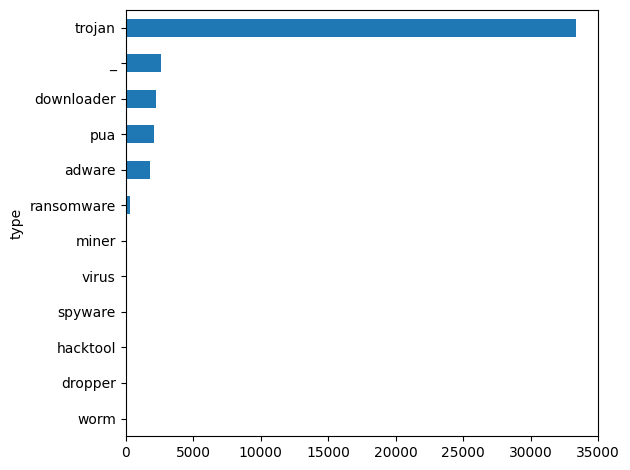

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['type'].value_counts(ascending=True).plot(kind='barh')

# Dataset Cleaning and Inverse Ordinal Encoding (for representation)

In [3]:
#INJECT PATTERN (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

print("Raw Clustered malicious samples")
how_many_clusters()

Raw Clustered malicious samples
Number of Clusters: 12597
Number of single-item Clusters: 10413
Number of Samples Remaining: 42797


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

type
trojan        33352
_              2638
downloader     2249
pua            2135
adware         1815
ransomware      341
miner           125
virus            79
spyware          48
hacktool          7
dropper           5
worm              3
Name: count, dtype: int64

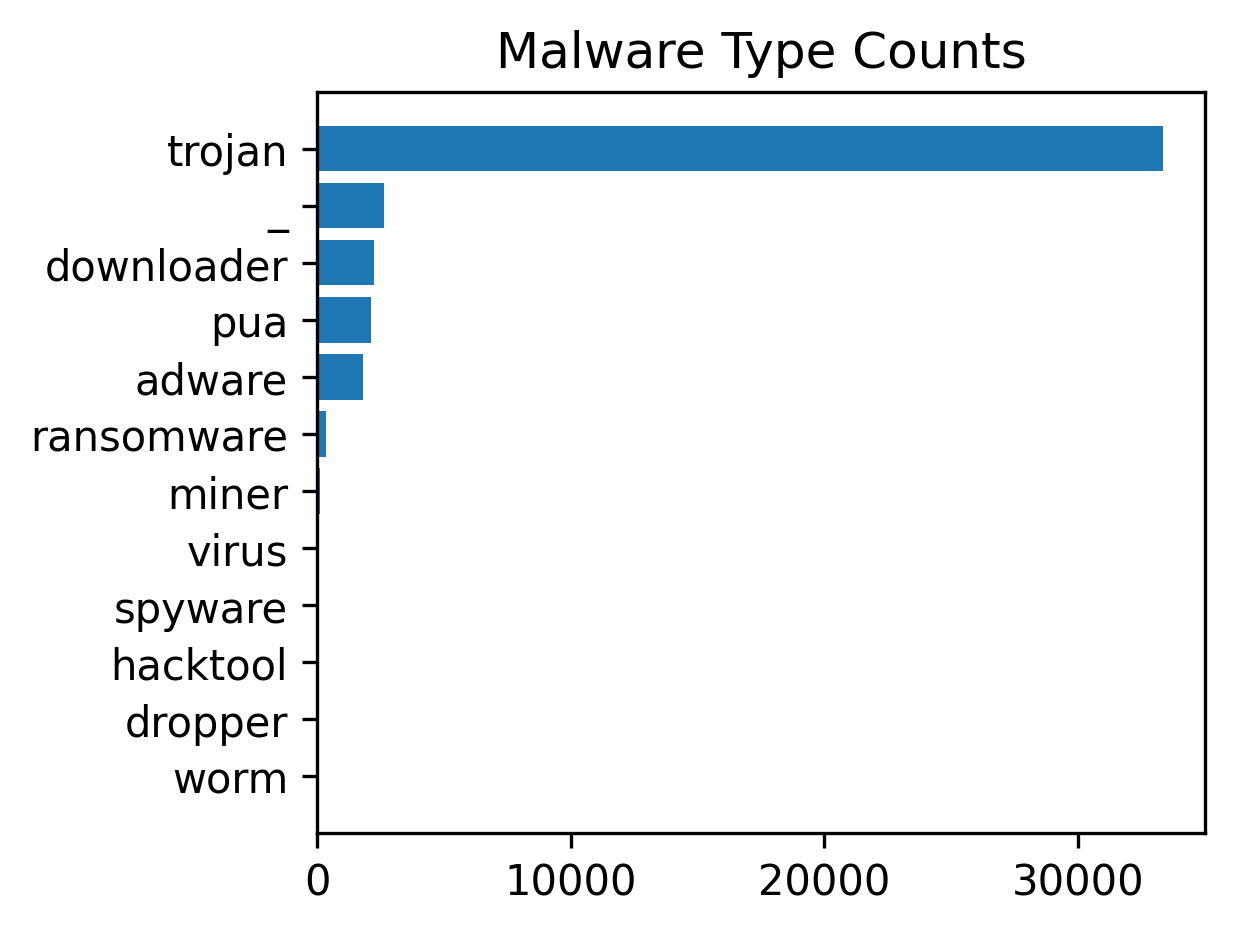

In [4]:
output = malicious_df['type'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['type'].value_counts().index, malicious_df['type'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## How many clusters are there?

In [5]:
#Prior to noise removal
print("Prior to noise removal")
how_many_clusters()

Prior to noise removal
Number of Clusters: 12597
Number of single-item Clusters: 10413
Number of Samples Remaining: 42797


In [6]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT (i.e. NOISE)
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if len(malicious_df[malicious_df['cluster'] == u]['type'].unique()) > 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

print("After removing yet unlabelled malicious samples\n and clusters with more than 1 malware type")
how_many_clusters()

After removing yet unlabelled malicious samples
 and clusters with more than 1 malware type
Number of Clusters: 12011
Number of single-item Clusters: 10413
Number of Samples Remaining: 17335


In [7]:
# REMOVE SINGLE ITEM CLUSTERS
unique_clusters = get_unique_clusters(malicious_df)
for u in unique_clusters:
    if malicious_df[malicious_df['cluster'] == u].shape[0] == 1:
        malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)

print("After removing single-item clusters")
how_many_clusters()

After removing single-item clusters
Number of Clusters: 1598
Number of single-item Clusters: 0
Number of Samples Remaining: 6922


## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [8]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 2: trojan (8); 
CLUSTER 11: trojan (10); 
CLUSTER 14: _ (2); 
CLUSTER 16: trojan (23); 
CLUSTER 17: trojan (12); 
CLUSTER 20: trojan (2); 
CLUSTER 25: trojan (29); 
CLUSTER 26: trojan (2); 
CLUSTER 35: trojan (14); 
CLUSTER 42: trojan (99); 
CLUSTER 43: trojan (2); 
CLUSTER 44: trojan (101); 
CLUSTER 47: trojan (2); 
CLUSTER 52: trojan (3); 
CLUSTER 57: trojan (12); 
CLUSTER 59: trojan (5); 
CLUSTER 61: trojan (16); 
CLUSTER 65: _ (2); 
CLUSTER 67: trojan (3); 
CLUSTER 69: trojan (19); 
CLUSTER 71: trojan (2); 
CLUSTER 73: downloader (4); 
CLUSTER 78: trojan (3); 
CLUSTER 81: trojan (7); 
CLUSTER 85: trojan (35); 
CLUSTER 87: miner (3); 
CLUSTER 88: trojan (28); 
CLUSTER 90: trojan (4); 
CLUSTER 93: adware (6); 
CLUSTER 94: trojan (12); 
CLUSTER 95: virus (7); 
CLUSTER 96: trojan (84); 
CLUSTER 100: trojan (2); 
CLUSTER 104: trojan (2); 
CLUSTER 107: trojan (11); 
CLUSTER 110: trojan (5); 
CLUSTER 121: _ (4); 
CLUSTER 124: trojan (11); 
CLUSTER 131: trojan (4); 
CLUSTER 132: tr

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [9]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['type'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['type'].unique())):
    matching = malicious_df[malicious_df['type'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType_woNoise.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount_woNoise.csv", index=False)

# of Unique Malware Type: 9

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 1361
Matching Clusters: [2, 11, 16, 17, 20, 25, 26, 35, 42, 43, 44, 47, 52, 57, 59, 61, 67, 69, 71, 78, 81, 85, 88, 90, 94, 96, 100, 104, 107, 110, 124, 131, 132, 134, 139, 146, 148, 151, 156, 161, 167, 169, 172, 182, 183, 190, 199, 202, 203, 214, 216, 222, 223, 239, 248, 253, 258, 261, 266, 270, 272, 274, 277, 280, 281, 283, 294, 301, 304, 306, 307, 309, 312, 314, 322, 326, 329, 333, 334, 337, 340, 343, 344, 345, 351, 355, 359, 366, 367, 368, 369, 370, 373, 374, 375, 376, 377, 386, 389, 390, 393, 397, 400, 406, 410, 416, 422, 427, 428, 431, 435, 438, 439, 442, 443, 446, 448, 451, 452, 455, 456, 457, 458, 460, 461, 463, 472, 478, 484, 486, 488, 489, 490, 492, 493, 496, 497, 503, 504, 508, 509, 520, 522, 524, 529, 531, 535, 537, 544, 548, 551, 552, 554, 571, 576, 577, 580, 585, 588, 600, 602, 607, 612, 619, 622, 623, 624, 626, 631, 632, 635, 640, 643, 644, 647, 649, 651, 652, 654, 661, 665,

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
8,trojan,1361,"[2, 11, 16, 17, 20, 25, 26, 35, 42, 43, 44, 47..."
7,_,130,"[14, 65, 121, 145, 361, 392, 402, 462, 500, 64..."
6,adware,58,"[93, 293, 609, 645, 899, 905, 1015, 1066, 1098..."
5,pua,30,"[278, 501, 506, 615, 1316, 1390, 1425, 2114, 3..."
4,miner,7,"[87, 1714, 2285, 3076, 3846, 3952, 5848]"
3,ransomware,5,"[384, 741, 1753, 4115, 7200]"
1,downloader,3,"[73, 803, 6110]"
2,virus,3,"[95, 4353, 5827]"
0,spyware,1,[6440]


## "What the API Calls are in each Malware Type"

In [10]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['type'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}_woNoise.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               96467
LdrLoadDll                           56743
LdrGetDllHandle                      40368
RegOpenKeyExW                        31588
NtAllocateVirtualMemory              31312
NtClose                              30650
LoadResource                         29623
FindResourceExW                      27677
RegQueryValueExW                     23749
RegCloseKey                          18752
NtQueryValueKey                      16133
NtOpenKey                            13587
GetSystemMetrics                     13238
GetSystemTimeAsFileTime              11100
SetErrorMode                          9198
NtProtectVirtualMemory                8270
NtFreeVirtualMemory                   7842
NtDelayExecution                      6494
RegOpenKeyExA                         6148
GetSystemInfo                         5581
GetFileAttributesW                    5264
NtOpenKeyEx                           5180
LoadStringA                           4653
SetU

_
LdrGetProcedureAddress               6340
LdrGetDllHandle                      4281
NtClose                              2774
NtAllocateVirtualMemory              2524
LdrLoadDll                           1996
NtReadFile                           1497
SetFilePointer                       1280
RegOpenKeyExW                        1192
NtOpenKey                            1027
NtQueryValueKey                       960
RegCloseKey                           948
NtFreeVirtualMemory                   864
GetSystemMetrics                      816
RegQueryValueExW                      789
LoadResource                          755
NtCreateFile                          711
FindResourceExW                       597
NtMapViewOfSection                    504
SetErrorMode                          454
FindFirstFileExW                      369
NtCreateSection                       321
GetSystemWindowsDirectoryW            296
NtWriteFile                           258
GetSystemTimeAsFileTime         

adware
LdrGetProcedureAddress               4205
LdrGetDllHandle                      3578
NtAllocateVirtualMemory              1427
NtClose                              1147
LdrLoadDll                            711
RegCloseKey                           605
GetSystemTimeAsFileTime               458
RegOpenKeyExA                         392
NtOpenKey                             390
NtQueryValueKey                       355
NtFreeVirtualMemory                   324
SetUnhandledExceptionFilter           298
SetErrorMode                          295
GetFileAttributesW                    257
RegOpenKeyExW                         256
NtCreateFile                          234
NtReadFile                            230
NtDelayExecution                      224
RegSetValueExA                        219
SHGetFolderPathW                      194
GetSystemMetrics                      190
NtOpenFile                            189
RegQueryValueExA                      179
RegCreateKeyExA            

pua
LdrGetProcedureAddress               1403
LdrGetDllHandle                       994
NtClose                               652
LdrLoadDll                            419
NtAllocateVirtualMemory               403
NtDeviceIoControlFile                 264
NtOpenKey                             247
NtQueryValueKey                       220
NtProtectVirtualMemory                177
GetSystemMetrics                      145
NtFreeVirtualMemory                   132
NtReadFile                            118
SetFilePointer                        112
RegOpenKeyExW                          99
RegCloseKey                            93
NtCreateFile                           69
GetSystemTimeAsFileTime                69
SetErrorMode                           63
LoadResource                           61
NtMapViewOfSection                     56
GetFileAttributesW                     52
SetUnhandledExceptionFilter            52
RegQueryValueExW                       50
FindResourceExW               

miner
LdrGetProcedureAddress            236
NtClose                           157
LdrGetDllHandle                   144
NtQueryAttributesFile             142
LdrLoadDll                        112
RegOpenKeyExW                     108
NtCreateFile                      102
NtMapViewOfSection                 99
NtCreateSection                    95
NtUnmapViewOfSection               93
RegCloseKey                        90
RegQueryValueExW                   82
NtAllocateVirtualMemory            73
GetSystemWindowsDirectoryW         56
LdrUnloadDll                       48
GetSystemInfo                      42
NtQueryValueKey                    42
NtOpenKey                          42
GetSystemTimeAsFileTime            38
GetSystemDirectoryW                36
RegOpenKeyExA                      28
WSAStartup                         27
NtProtectVirtualMemory             25
NtDuplicateObject                  23
LoadStringW                        20
NtOpenDirectoryObject              20
NtCrea

ransomware
NtClose                       210
NtAllocateVirtualMemory       172
NtOpenKey                     138
NtQuerySystemInformation      126
RegQueryValueExW              112
RegOpenKeyExW                 112
NtFreeVirtualMemory           107
RegCloseKey                   107
NtQueryValueKey                75
LdrGetProcedureAddress         33
LdrLoadDll                     21
NtCreateFile                   21
NtEnumerateValueKey            18
NtEnumerateKey                 18
NtOpenFile                     17
NtMapViewOfSection             15
NtCreateSection                15
CreateToolhelp32Snapshot       15
GetSystemWindowsDirectoryW     15
NtQueryInformationFile         15
NtCreateMutant                 15
Process32NextW                 13
Process32FirstW                13
LdrGetDllHandle                12
NtOpenProcess                   9
GetComputerNameW                9
GetUserNameW                    9
SHGetFolderPathW                9
CreateThread                    8
NtD

downloader
LdrGetProcedureAddress         264
LdrLoadDll                     140
LdrGetDllHandle                128
NtClose                         54
NtReadFile                      40
NtAllocateVirtualMemory         40
NtWriteFile                     30
LdrUnloadDll                    28
NtCreateFile                    26
GetSystemTimeAsFileTime         22
SetFilePointer                  20
LoadResource                    18
RegCloseKey                     16
FindFirstFileExW                16
FindResourceExW                 16
RegOpenKeyExW                   12
SetUnhandledExceptionFilter     10
SizeofResource                  10
RegQueryValueExW                 8
SetErrorMode                     8
GetFileType                      8
NtQueryAttributesFile            8
NtFreeVirtualMemory              8
RegOpenKeyExA                    8
RegQueryValueExA                 8
GetFileAttributesW               8
CoInitializeEx                   6
IsDebuggerPresent                4
GetSystem

virus
NtReadFile                           196
NtWriteFile                          190
LdrGetProcedureAddress               105
LdrLoadDll                            85
NtClose                               62
NtAllocateVirtualMemory               37
NtCreateFile                          35
RegCloseKey                           33
FindResourceExW                       28
LdrGetDllHandle                       25
NtOpenKey                             22
NtQueryValueKey                       22
LoadResource                          21
RegOpenKeyExA                         20
RegOpenKeyExW                         18
LoadStringA                           18
SetFilePointer                        17
GetSystemWindowsDirectoryW            16
GetTempPathW                          15
RegQueryValueExW                      14
GetSystemMetrics                      14
NtFreeVirtualMemory                   13
NtQueryAttributesFile                  9
GetFileAttributesW                     9
NtDuplicat

spyware
FindResourceExW               57
LoadResource                  48
LdrGetProcedureAddress        39
LdrGetDllHandle               33
GetSystemMetrics              18
NtAllocateVirtualMemory       15
NtClose                       12
LdrLoadDll                     9
LoadStringA                    9
NtOpenKey                      6
DrawTextExW                    6
RegOpenKeyExA                  6
NtQueryValueKey                6
RegCloseKey                    3
GetSystemWindowsDirectoryW     3
NtCreateFile                   3
NtCreateSection                3
NtMapViewOfSection             3
RegQueryValueExA               3
NtQueryAttributesFile          3
NtFreeVirtualMemory            3
GetSystemInfo                  3
GetSystemDirectoryW            3
CreateThread                   3
WSAStartup                     3
Name: count, dtype: int64

## "What the Unique API Calls are in each Malware Type"

In [11]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['LookupPrivilegeValueW', 'CryptCreateHash', 'CryptHashData', 'EnumWindows', 'OpenSCManagerA', 'OpenServiceA', 'StartServiceA', 'CryptProtectData', 'CryptEncrypt', 'CryptDecrypt', 'WriteConsoleA', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'GetVolumePathNamesForVolumeNameW', 'GetVolumePathNameW', 'StartServiceW', 'GetSystemWindowsDirectoryA', 'RegEnumValueA', 'GetComputerNameA', 'CreateServiceW', 'DeleteUrlCacheEntryA', 'CopyFileExW', 'GetFileAttributesExW', 'CreateServiceA', 'SetStdHandle', 'CreateJobObjectW', 'gethostbyname', 'NtSetContextThread', 'InternetOpenA', 'InternetSetOptionA', 'InternetConnectA', 'HttpOpenRequestA', 'NtCreateKey', 'NtSetValueKey', 'RegisterHotKey', 'Module32FirstW', 'Module32NextW', 'GetFileInformationByHandle', 'DnsQuery_A', 'send', 'recv', 'GetAsyncKeyState', 'UnhookWindowsHookEx', 'InternetOpenW', 'GetKeyState', 'RtlDecompressBuffer', 'InternetCloseHandle', 'InternetCrackUrlW']


1 _
['GetFileSizeEx', 'FindResourceExA', 'GetSystemDirectoryA', 

## How many samples remaining?

In [12]:
print(f"{malicious_df.shape[0]}\n{malicious_df.shape[0]/42797*100:.4f}%")

6922
16.1740%


## What are the remaining clusters?

In [13]:
how_many_clusters()

Number of Clusters: 1598
Number of single-item Clusters: 0
Number of Samples Remaining: 6922
